In [1]:
# Cell 1: Imports & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/Project_Data.csv', parse_dates=['Date'])


In [2]:
# Cell 2: Initial Inspection
display(df.head(), df.tail())
print(df.info())
display(df.describe().T)
print("Missing values:\n", df.isnull().sum())


,Date,Product_ID,Category,Price,Promotion,Stock_Level,Customer_Ratings,Competitor_Price,Sales_Volume
0,2023-01-01,P001,Electronics,206.85,0,529,4.45,193.54,138
1,2023-01-01,P002,Electronics,338.23,0,466,4.76,346.23,175
2,2023-01-01,P003,Apparel,51.49,0,609,4.29,47.67,103
3,2023-01-01,P004,Apparel,73.24,0,560,4.27,72.95,140
4,2023-01-01,P005,Home Appliances,150.11,0,383,4.44,144.76,118


,Date,Product_ID,Category,Price,Promotion,Stock_Level,Customer_Ratings,Competitor_Price,Sales_Volume
995,2023-04-10,P006,Home Appliances,253.74,0,327,4.58,246.59,135
996,2023-04-10,P007,Books,20.65,0,782,4.74,18.44,108
997,2023-04-10,P008,Books,29.03,0,730,4.76,28.66,118
998,2023-04-10,P009,Toys,32.82,1,647,4.40,38.91,189
999,2023-04-10,P010,Toys,55.27,0,675,4.51,53.78,106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Product_ID        1000 non-null   object        
 2   Category          1000 non-null   object        
 3   Price             1000 non-null   float64       
 4   Promotion         1000 non-null   int64         
 5   Stock_Level       1000 non-null   int64         
 6   Customer_Ratings  1000 non-null   float64       
 7   Competitor_Price  1000 non-null   float64       
 8   Sales_Volume      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 70.4+ KB
None


,count,mean,min,25%,50%,75%,max,std
Date,1000,2023-02-19 12:00:00,2023-01-01 00:00:00,2023-01-25 18:00:00,2023-02-19 12:00:00,2023-03-16 06:00:00,2023-04-10 00:00:00,NaN
Price,1000.0,116.15109,15.52,38.845,57.98,193.76,367.47,102.144495
Promotion,1000.0,0.317,0.0,0.0,0.0,1.0,1.0,0.46554
Stock_Level,1000.0,573.452,300.0,448.0,578.5,698.0,850.0,145.09419
Customer_Ratings,1000.0,4.50108,4.1,4.3275,4.5,4.67,4.9,0.199573
Competitor_Price,1000.0,117.32109,18.44,37.9225,62.215,190.3975,349.88,102.709
Sales_Volume,1000.0,146.608,94.0,122.0,141.0,164.0,243.0,31.297826


Missing values:
 Date                0
Product_ID          0
Category            0
Price               0
Promotion           0
Stock_Level         0
Customer_Ratings    0
Competitor_Price    0
Sales_Volume        0
dtype: int64


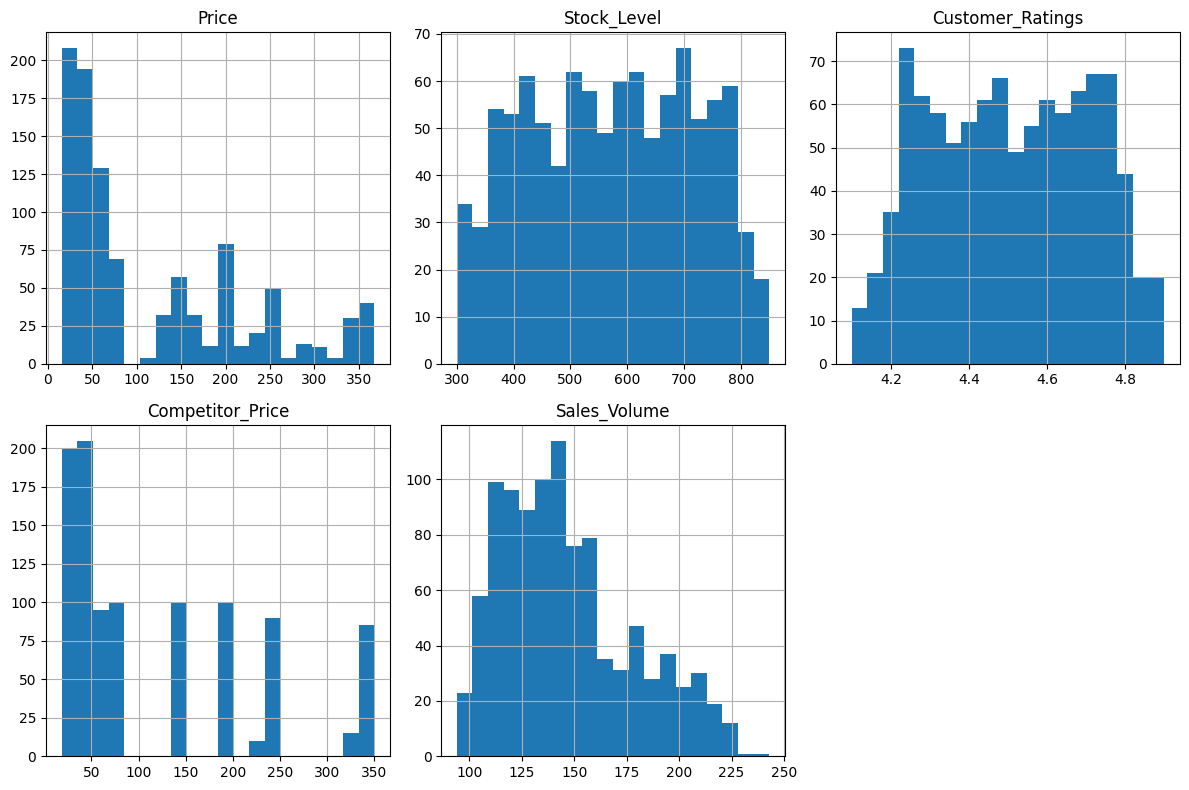

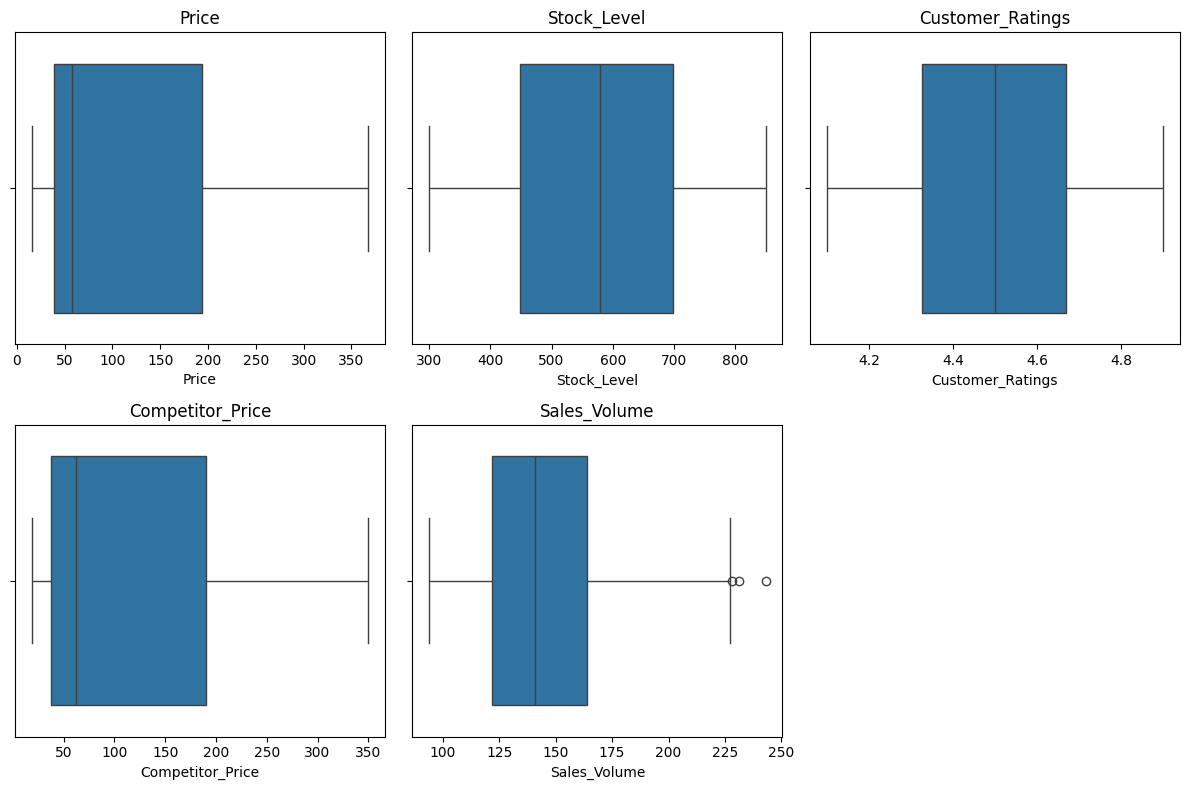

In [3]:
# Cell 3: Univariate Analysis — Numeric
num_cols = ['Price','Stock_Level','Customer_Ratings','Competitor_Price','Sales_Volume']

# Histograms
df[num_cols].hist(bins=20, figsize=(12,8), layout=(2,3))
plt.tight_layout(); plt.show()

# Boxplots
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout(); plt.show()


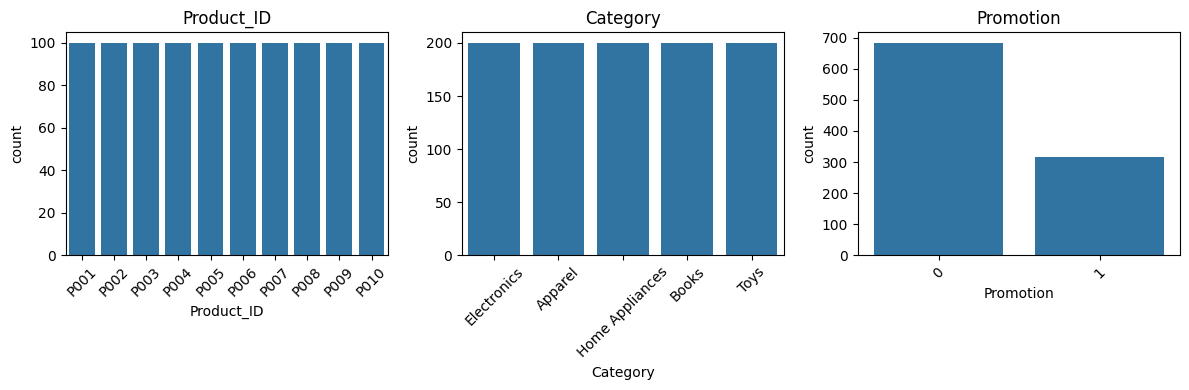

In [4]:
# Cell 4: Univariate Analysis — Categorical
cat_cols = ['Product_ID','Category','Promotion']

plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols, start=1):
    plt.subplot(1,3,i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


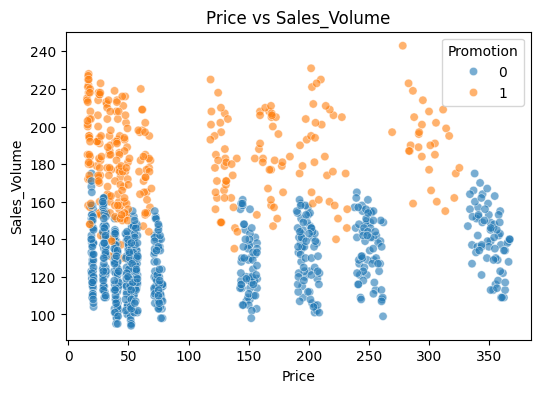

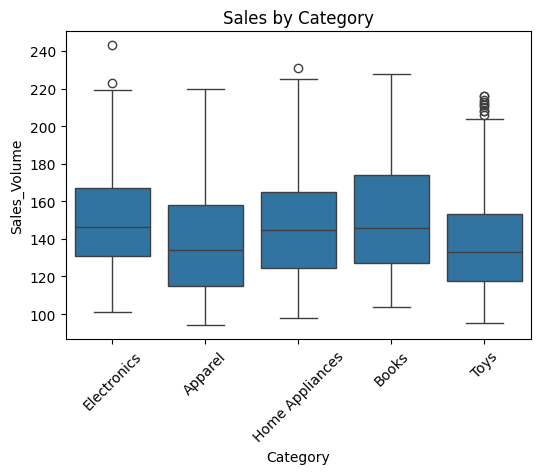

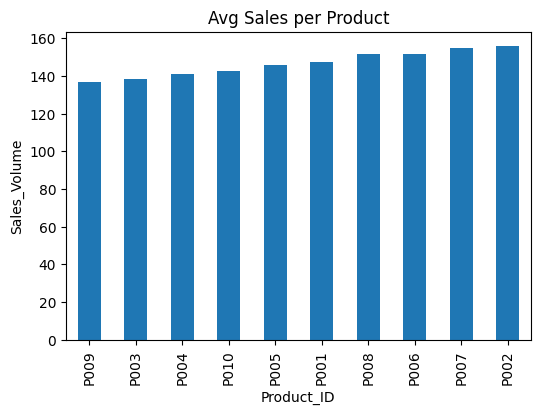

In [5]:
# Cell 5: Bivariate Analysis
# Price vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Price', y='Sales_Volume', hue='Promotion', alpha=0.6)
plt.title('Price vs Sales_Volume'); plt.show()

# Sales by Category
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Category', y='Sales_Volume')
plt.title('Sales by Category'); plt.xticks(rotation=45); plt.show()

# Avg Sales per Product
plt.figure(figsize=(6,4))
df.groupby('Product_ID')['Sales_Volume'].mean().sort_values().plot.bar()
plt.title('Avg Sales per Product'); plt.ylabel('Sales_Volume'); plt.show()


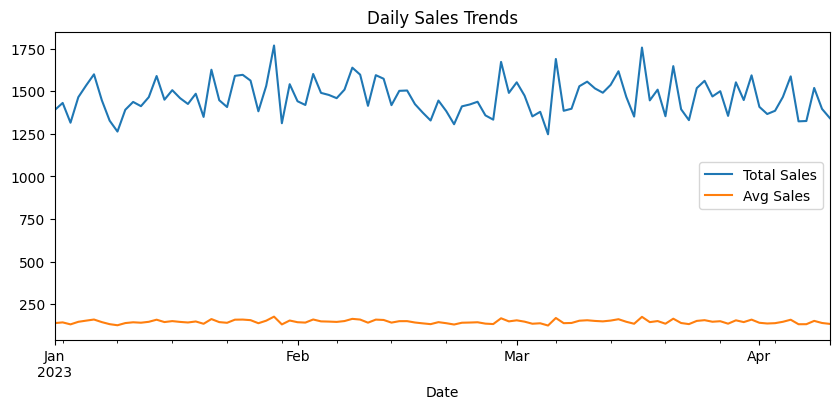

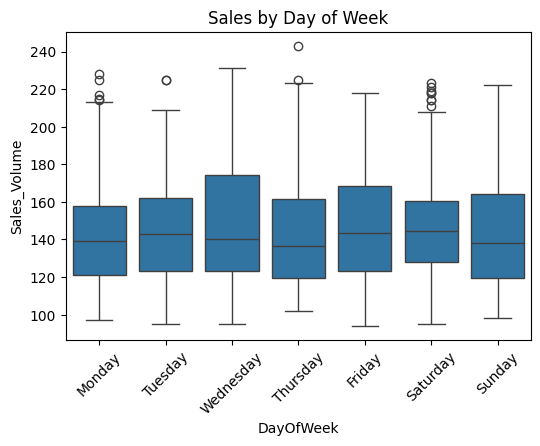

In [6]:
# Cell 6: Time-Series Analysis
daily = df.groupby('Date')['Sales_Volume'].agg(['sum','mean'])
plt.figure(figsize=(10,4))
daily['sum'].plot(label='Total Sales')
daily['mean'].plot(label='Avg Sales')
plt.legend(); plt.title('Daily Sales Trends'); plt.show()

df['DayOfWeek'] = df['Date'].dt.day_name()
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='DayOfWeek', y='Sales_Volume',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sales by Day of Week'); plt.xticks(rotation=45); plt.show()


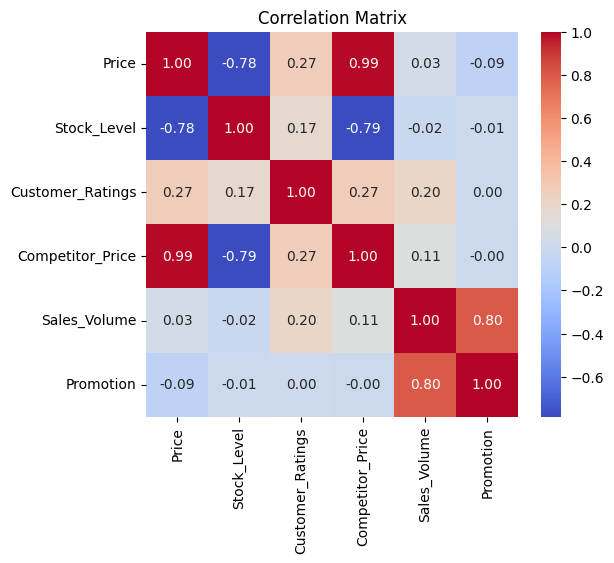

<Figure size 1000x1000 with 0 Axes>

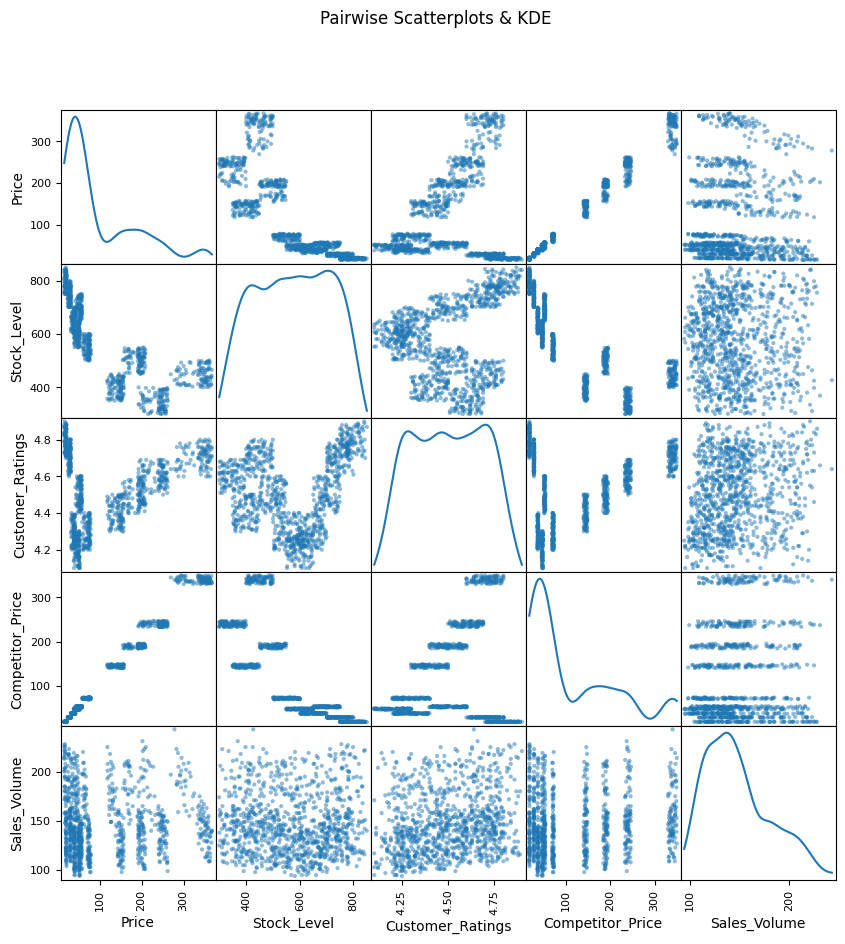

In [7]:
# Cell 7: Correlation & Pairwise Plots
from pandas.plotting import scatter_matrix

# Correlation matrix
corr = df[num_cols + ['Promotion']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix'); plt.show()

# Pairwise scatter + KDE diagonal
plt.figure(figsize=(10,10))
scatter_matrix(df[num_cols], alpha=0.5, diagonal='kde', figsize=(10,10))
plt.suptitle('Pairwise Scatterplots & KDE'); plt.show()


In [8]:
# Cell 8: Feature Engineering & Train/Test Split
encoder = OneHotEncoder(sparse_output=False)
X_cat = encoder.fit_transform(df[cat_cols])
X_num = df[['Price','Promotion','Stock_Level','Customer_Ratings','Competitor_Price']].values

X = np.hstack([X_cat, X_num])
y = df['Sales_Volume'].values

feature_names = list(encoder.get_feature_names_out(cat_cols)) + \
                ['Price','Promotion','Stock_Level','Customer_Ratings','Competitor_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# Cell 9: Train & Evaluate All Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LinearRegression': LinearRegression(),
    'Ridge':            Ridge(alpha=1.0),
    'Lasso':            Lasso(alpha=0.1),
    'ElasticNet':       ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR':              SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'DecisionTree':     DecisionTreeRegressor(max_depth=5, random_state=42),
    'RandomForest':     RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse  = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results.append({'Model': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

results_df = pd.DataFrame(results).set_index('Model')
display(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.780e+02, tolerance: 7.867e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+03, tolerance: 7.867e+01
  model = cd_fast.enet_coordinate_descent(


,MSE,RMSE,MAE,R2
Model,,,,
LinearRegression,311.643085,17.653416,14.593119,0.671291
Ridge,311.366897,17.645591,14.610667,0.671582
Lasso,310.743422,17.627916,14.621885,0.672240
ElasticNet,312.476468,17.677004,14.653013,0.670412
SVR,1036.727502,32.198253,24.634795,-0.093500
DecisionTree,319.892311,17.885534,14.561741,0.662590
RandomForest,311.343008,17.644915,14.385400,0.671607
GradientBoosting,309.482407,17.592112,14.364613,0.673570


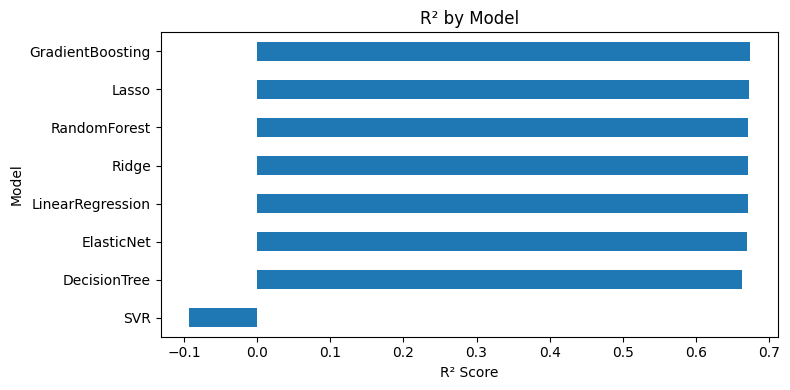

In [10]:
# Cell 10: Visualize R² Comparison
plt.figure(figsize=(8,4))
results_df['R2'].sort_values().plot.barh()
plt.title('R² by Model'); plt.xlabel('R² Score'); plt.tight_layout(); plt.show()


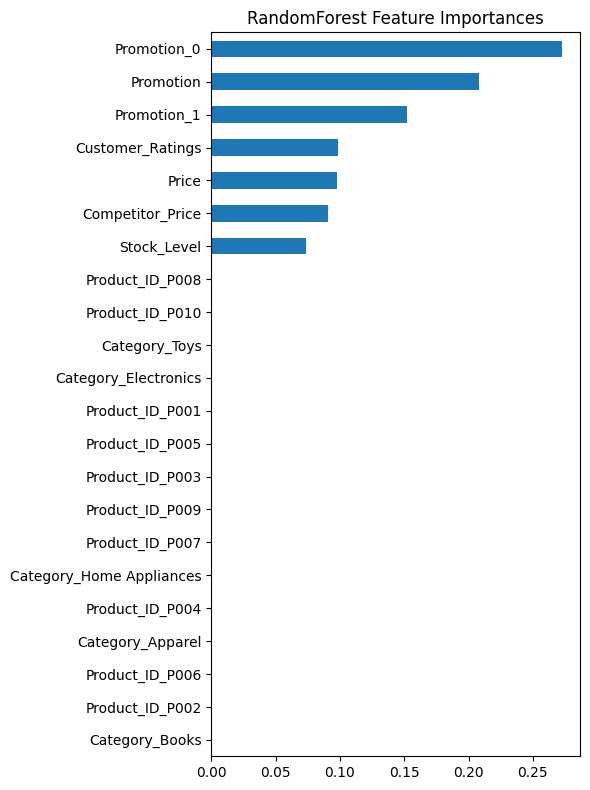

In [11]:
# Cell 11 (Optional): RandomForest Feature Importances
rf = models['RandomForest']
importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values()

plt.figure(figsize=(6,8))
importances.plot.barh()
plt.title('RandomForest Feature Importances'); plt.tight_layout(); plt.show()


In [12]:
# Cell 12: Compute & Display Feature Impacts for Each Model
from sklearn.inspection import permutation_importance

# Prepare an empty DataFrame with features as the index
impacts_df = pd.DataFrame(index=feature_names)

for name, model in models.items():
    if hasattr(model, "coef_"):
        # Linear models: use coefficients
        imp = model.coef_
    elif hasattr(model, "feature_importances_"):
        # Tree‐based: use built-in importances
        imp = model.feature_importances_
    else:
        # SVR or others: approximate via permutation importance
        result = permutation_importance(
            model, X_test, y_test,
            n_repeats=5, random_state=42, n_jobs=-1
        )
        imp = result.importances_mean

    impacts_df[name] = imp

print("=== Feature Impacts Across Models ===")
display(impacts_df)


=== Feature Impacts Across Models ===


,LinearRegression,Ridge,Lasso,ElasticNet,SVR,DecisionTree,RandomForest,GradientBoosting
Product_ID_P001,18.860195,3.135065,0.000000,0.000000,-5.170614e-08,0.000000,0.000541,0.000000
Product_ID_P002,-83.522741,-9.629409,-0.000000,-0.928194,-3.488488e-08,0.000000,0.000136,0.000000
Product_ID_P003,22.535385,2.776772,-0.000000,-1.252590,1.857711e-08,0.000000,0.000427,0.000315
Product_ID_P004,5.745639,1.239916,0.000000,-0.000000,1.449947e-08,0.000000,0.000311,0.000000
Product_ID_P005,15.071625,1.022063,-0.000000,-0.299332,2.326480e-09,0.000000,0.000480,0.000000
Product_ID_P006,-47.236109,-3.460862,1.123933,2.157296,6.752686e-08,0.000000,0.000167,0.000000
Product_ID_P007,20.312394,0.638220,0.000000,1.410485,-1.345411e-07,0.000000,0.000323,0.000000
Product_ID_P008,16.346441,1.462856,0.000000,0.570059,2.579040e-07,0.000000,0.000818,0.000000
Product_ID_P009,22.909877,2.827703,-0.000000,-1.525785,-2.854907e-07,0.000000,0.000354,0.001308
Product_ID_P010,8.977294,-0.012324,-0.000000,0.000000,-3.650747e-09,0.000000,0.000731,0.000000


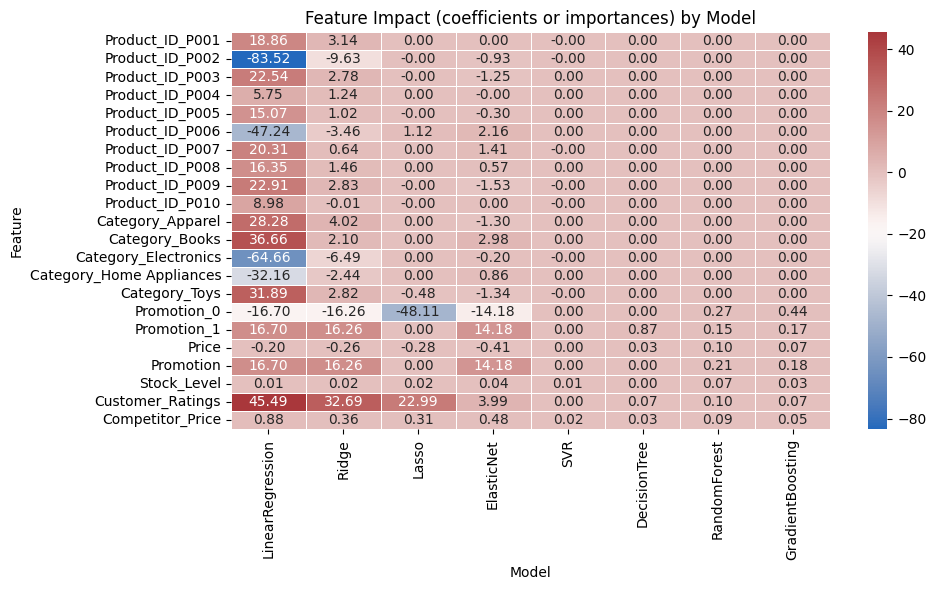

In [13]:
# Cell 13: Heatmap of Feature Impacts
plt.figure(figsize=(10, 6))
sns.heatmap(
    impacts_df,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    linewidths=0.5
)
plt.title("Feature Impact (coefficients or importances) by Model")
plt.xlabel("Model")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [1]:
# Cell 1: Imports & Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.tsa.statespace.sarimax import SARIMAX

# load and parse dates
df = pd.read_csv("Project_Data.csv", parse_dates=["Date"])
df.sort_values(["Product_ID","Date"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [2]:
# Cell 2: Feature Engineering & Preprocessing
# 2a) Create time features
df["DayOfWeek"] = df["Date"].dt.day_name()

# 2b) Lag features per product
df["lag_1"] = df.groupby("Product_ID")["Sales_Volume"].shift(1)
df["lag_7"] = df.groupby("Product_ID")["Sales_Volume"].shift(7)

# drop first week of each SKU (NaNs)
df = df.dropna(subset=["lag_1","lag_7"]).reset_index(drop=True)

# 2c) One-hot encode Category & Promotion (drop_first to avoid collinearity)
df = pd.get_dummies(df,
                    columns=["Category","Promotion"],
                    prefix=["Cat","Promo"],
                    drop_first=True)

# 2d) Keep these for modeling
model_cols_num = ["Price","Stock_Level","Customer_Ratings","Competitor_Price","lag_1","lag_7"]
model_cols_cat = [c for c in df.columns
                  if c.startswith("Cat_") or c.startswith("Promo_")]

# final feature matrix & target
X = df[model_cols_cat + model_cols_num]
y = df["Sales_Volume"]

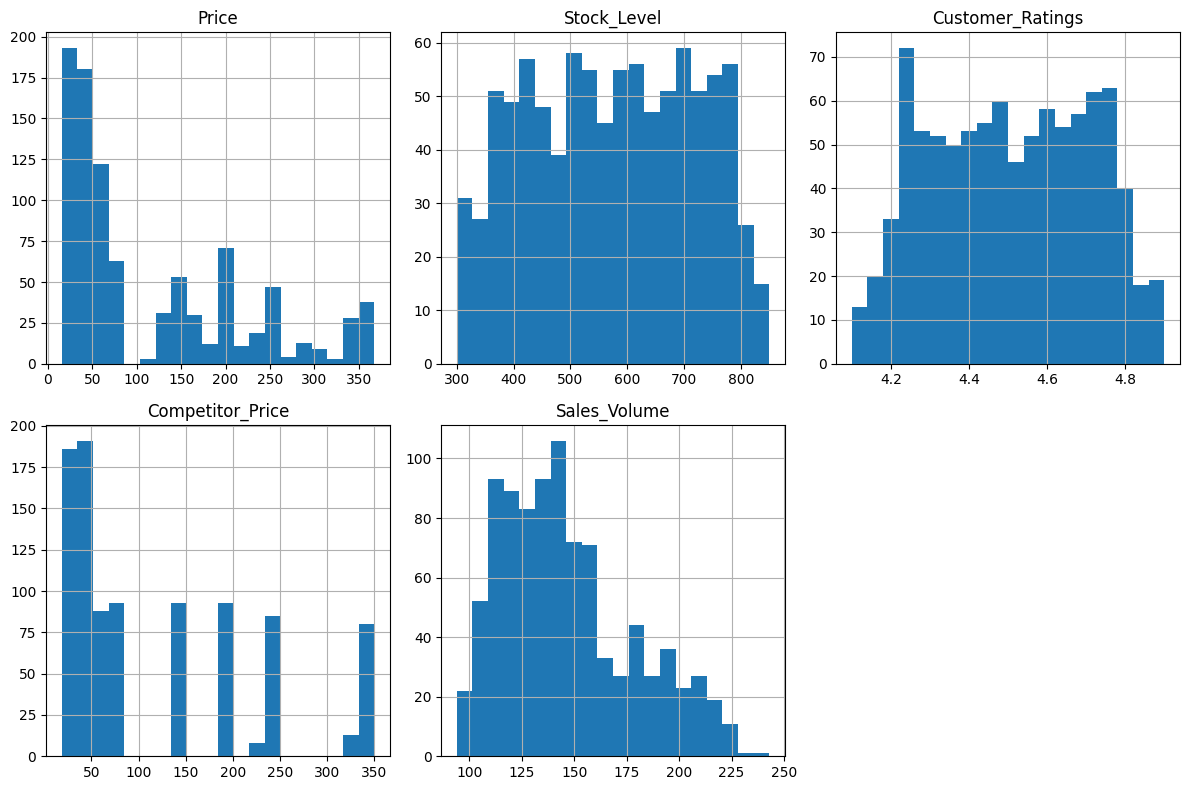

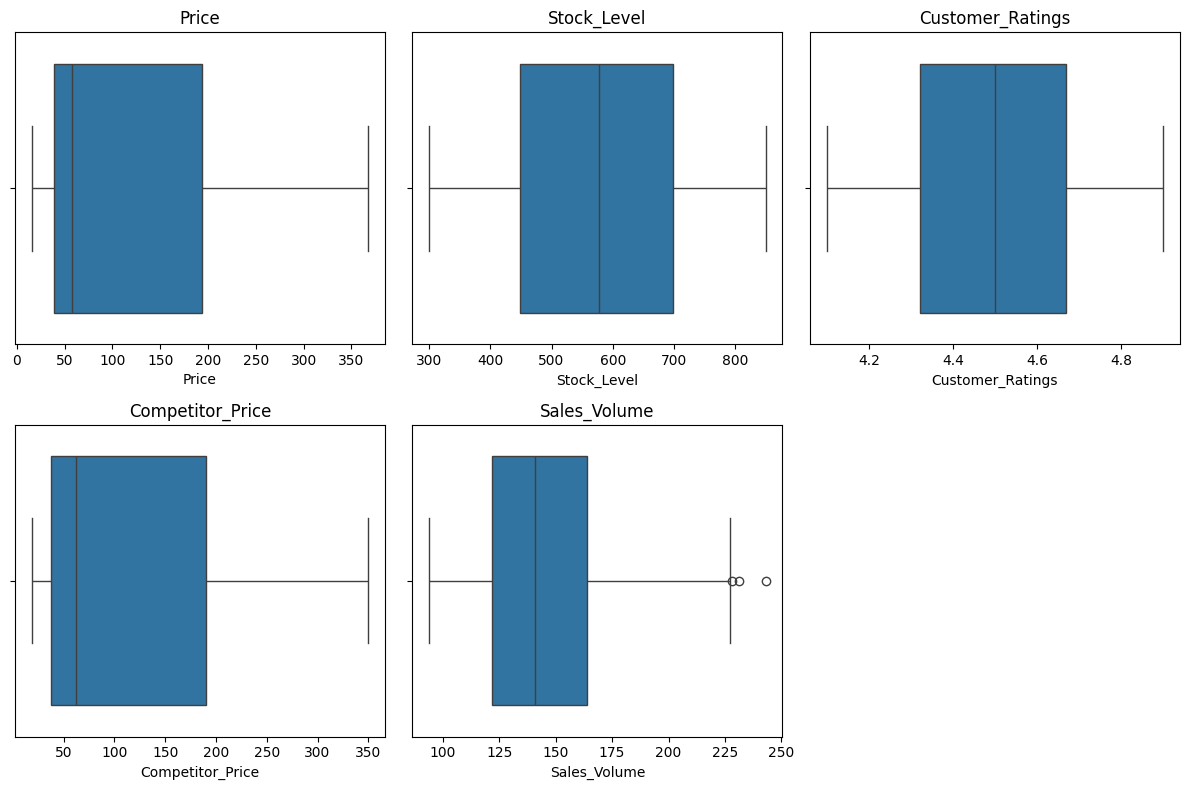

In [3]:
# Cell 3: Univariate Analysis — Numeric
num_cols = ["Price","Stock_Level","Customer_Ratings","Competitor_Price","Sales_Volume"]
df[num_cols].hist(bins=20, figsize=(12,8), layout=(2,3))
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout(); plt.show()

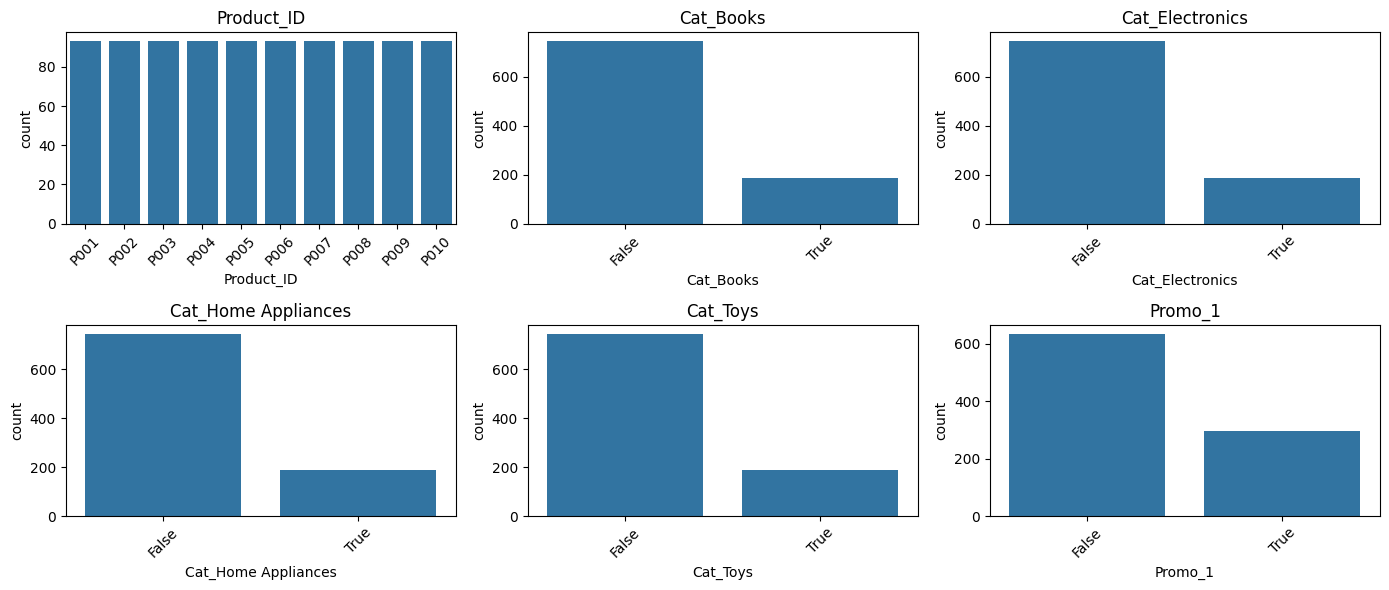

In [4]:
# Cell 4: Univariate Analysis — Categorical
cat_vis = ["Product_ID"] + [c for c in df.columns if c.startswith("Cat_") or c.startswith("Promo_")]
plt.figure(figsize=(14,6))
for i, col in enumerate(cat_vis,1):
    plt.subplot(2, int(np.ceil(len(cat_vis)/2)), i)
    if col=="Product_ID":
        sns.countplot(data=df, x=col, order=sorted(df[col].unique()))
    else:
        sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout(); plt.show()

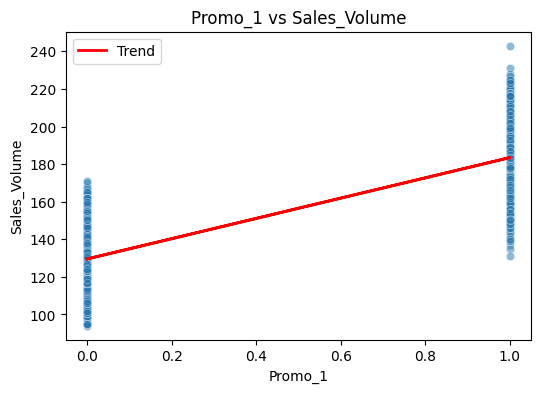

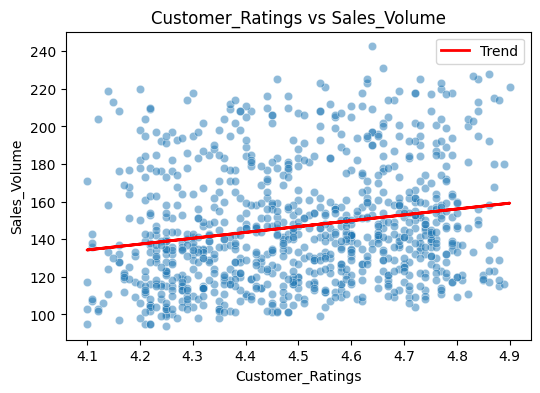

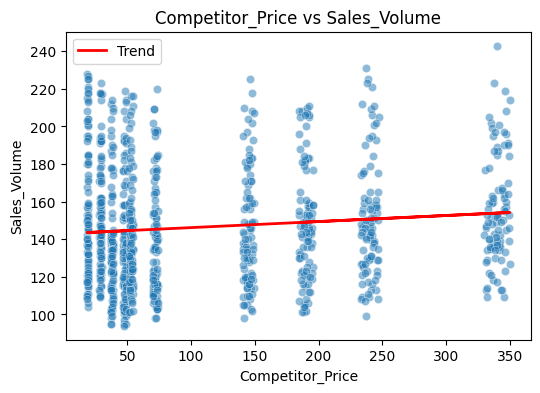

In [5]:
# Cell 5: Bivariate Analysis with Trend-Lines
top_corr = ["Promo_1","Customer_Ratings","Competitor_Price"]
for col in top_corr:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="Sales_Volume", alpha=0.5)
    m, b = np.polyfit(df[col], df["Sales_Volume"], 1)
    plt.plot(df[col], m*df[col] + b, color="red", lw=2, label="Trend")
    plt.title(f"{col} vs Sales_Volume")
    plt.legend(); plt.show()

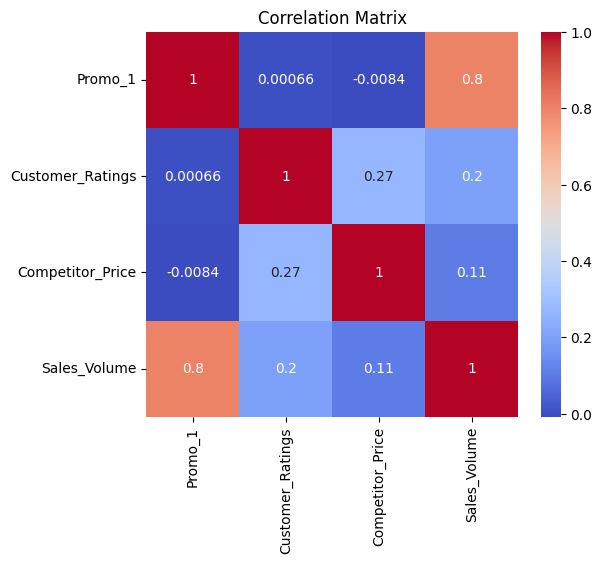

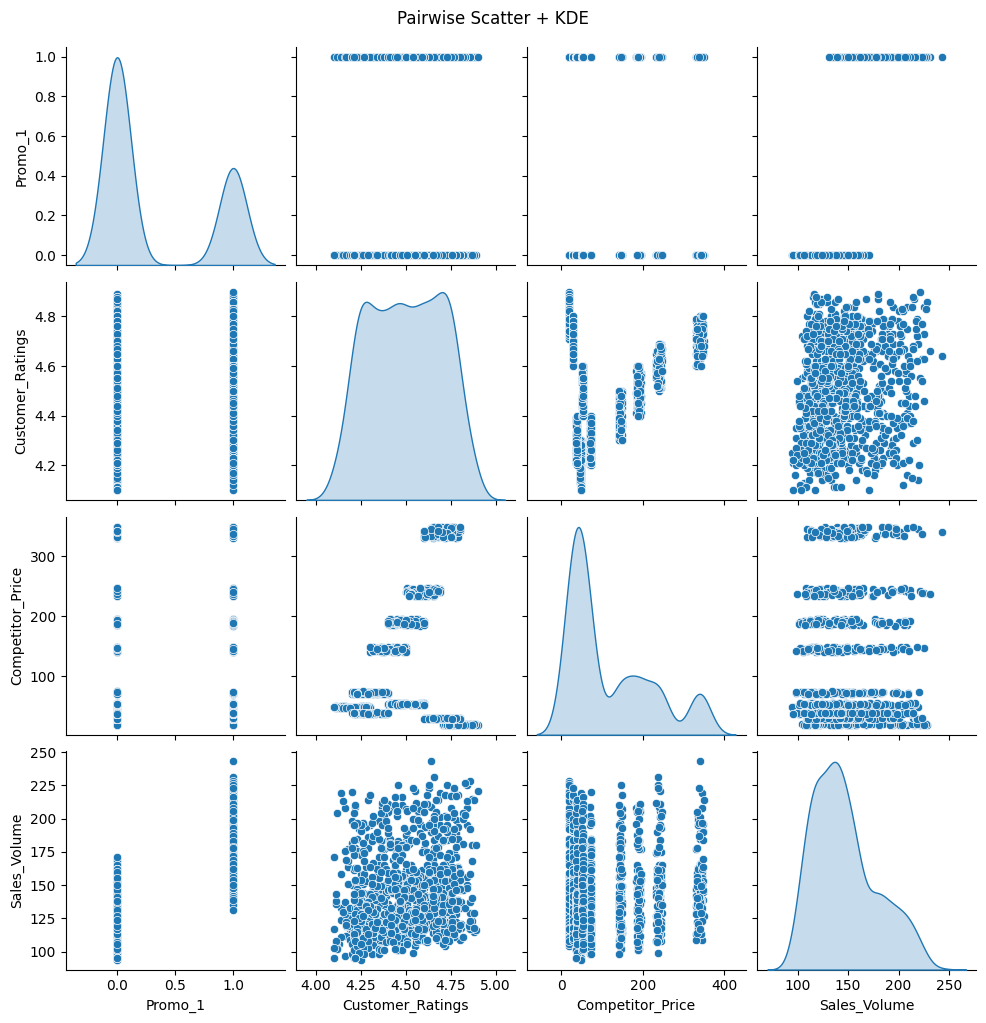

In [6]:
# Cell 6: Correlation & Pairwise (selected)
plt.figure(figsize=(6,5))
sns.heatmap(df[top_corr + ["Sales_Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix"); plt.show()

sns.pairplot(df[top_corr + ["Sales_Volume"]], diag_kind="kde", height=2.5)
plt.suptitle("Pairwise Scatter + KDE", y=1.02); plt.show()

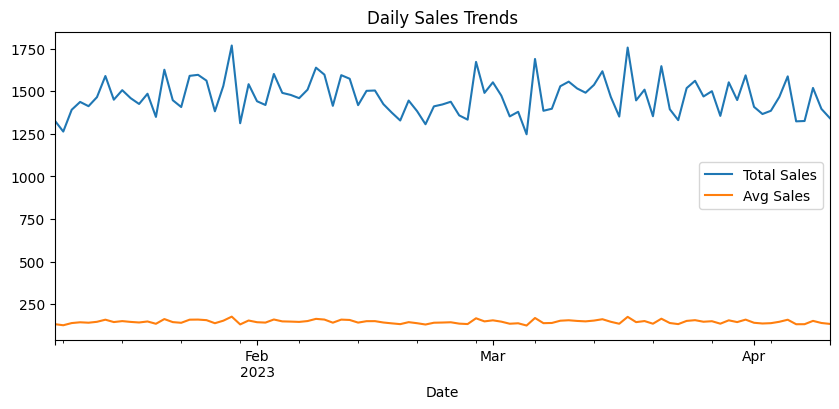

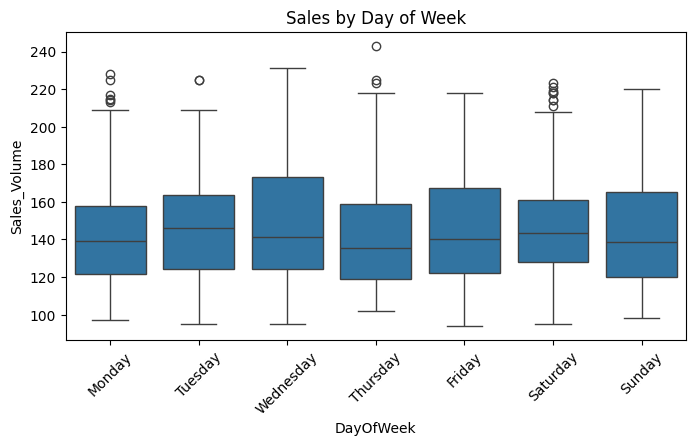

In [7]:
# Cell 7: Time-Series Analysis on Daily Aggregate
daily = df.groupby("Date")["Sales_Volume"].agg(["sum","mean"]).rename(columns={"sum":"Total","mean":"Avg"})
plt.figure(figsize=(10,4))
daily["Total"].plot(label="Total Sales")
daily["Avg"].plot(label="Avg Sales")
plt.legend(); plt.title("Daily Sales Trends"); plt.show()

plt.figure(figsize=(8,4))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.boxplot(data=df, x="DayOfWeek", y="Sales_Volume", order=order)
plt.title("Sales by Day of Week"); plt.xticks(rotation=45); plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1000x400 with 0 Axes>

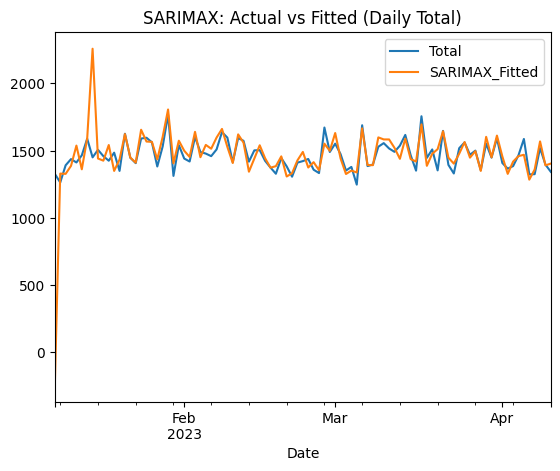

In [8]:
# Cell 8: SARIMAX on Daily Total (with mean exogenous Price & Promo)
exog = df.groupby("Date")[["Price","Promo_1"]].mean()
model = SARIMAX(daily["Total"], order=(1,1,1), seasonal_order=(1,1,1,7), exog=exog)
res  = model.fit(disp=False)
daily["SARIMAX_Fitted"] = res.fittedvalues

plt.figure(figsize=(10,4))
daily[["Total","SARIMAX_Fitted"]].plot()
plt.title("SARIMAX: Actual vs Fitted (Daily Total)"); plt.show()

In [9]:
# Cell 9: Train/Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# a) Base regressions on raw features
models = {
    "Linear":     LinearRegression(),
    "Ridge":      Ridge(),
    "Lasso":      Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Tree":       DecisionTreeRegressor(max_depth=5, random_state=42),
    "RF":         RandomForestRegressor(n_estimators=100, random_state=42),
    "GB":         GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# b) SVR in a pipeline with scaling
models["SVR"] = Pipeline([
    ("scale", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=1.0, epsilon=0.1))
])

results = []
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    mse  = mean_squared_error(y_test, pred)
    results.append({
        "Model": name,
        "RMSE": np.sqrt(mse),
        "MAE":  mean_absolute_error(y_test, pred),
        "R2":   r2_score(y_test, pred)
    })

res_df = pd.DataFrame(results).set_index("Model").round(3)
display(res_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+02, tolerance: 7.318e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+02, tolerance: 7.318e+01
  model = cd_fast.enet_coordinate_descent(


,RMSE,MAE,R2
Model,,,
Linear,18.295,15.288,0.661
Ridge,18.300,15.283,0.661
Lasso,18.269,15.226,0.662
ElasticNet,19.072,15.805,0.632
Tree,19.336,15.608,0.622
RF,18.250,14.980,0.663
GB,18.586,15.081,0.650
SVR,23.267,18.551,0.452


In [1]:
# @title R2

from matplotlib import pyplot as plt
res_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'res_df' is not defined